# Question 1. Implement LeNet on Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train_coarse), (x_test, y_test_coarse) = cifar100.load_data(label_mode='coarse')

# Print the shapes of the loaded data
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train_coarse.shape)
print('Testing data shape:', x_test.shape)
print('Testing labels shape:', y_test_coarse.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


2. Check if there are 20 labels in y_train using np.unique().

In [2]:
import numpy as np

# Convert y_train to a 1D array if it's not already
y_train_1d = np.squeeze(y_train_coarse)

# Find unique labels in y_train
unique_labels = np.unique(y_train_1d)

# Check the number of unique labels
num_labels = len(unique_labels)

print('Number of unique labels in y_train:', num_labels)

Number of unique labels in y_train: 20


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

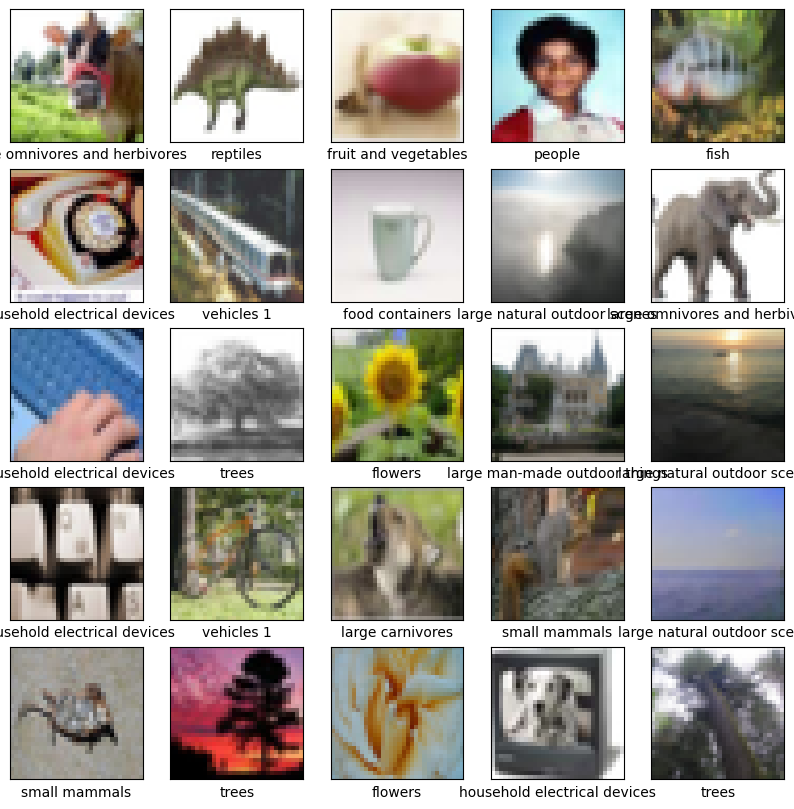

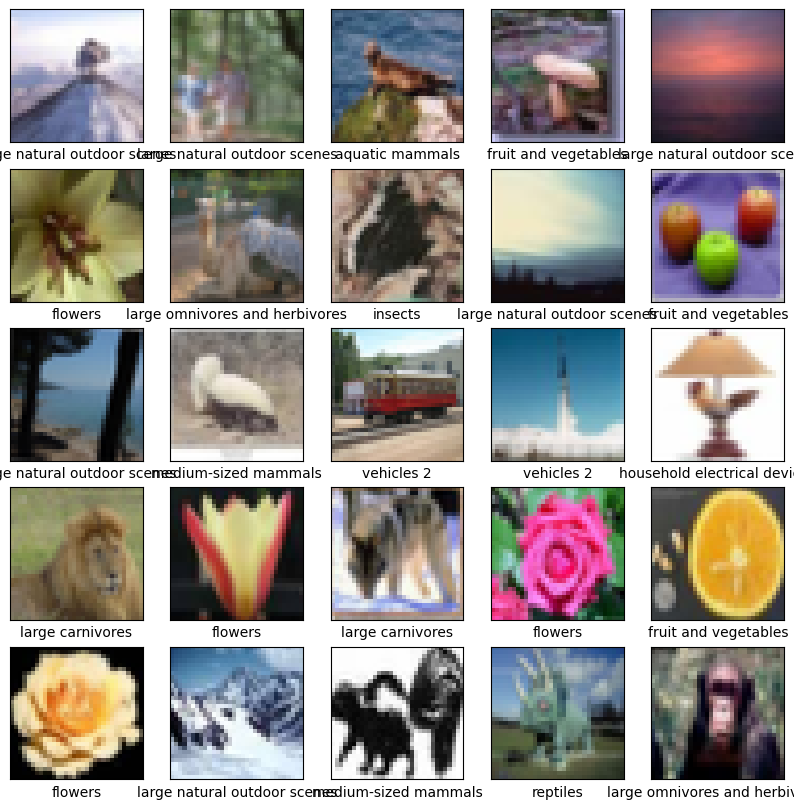

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100

# Load the CIFAR-100 dataset
(_, _), (x_test, _) = cifar100.load_data()

# Define a list of class names for CIFAR-100
class_names = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]

# Function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Plot the first 25 images from the train data
plot_images(x_train[:25], y_train_coarse[:25])

# Plot the first 25 images from the test data
plot_images(x_test[:25], y_test_coarse[:25])

4. Normalize the data

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train_coarse), (x_test, y_test_coarse) = cifar100.load_data(label_mode='coarse')

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Verify the normalization
print('Min value in x_train:', np.min(x_train))
print('Max value in x_train:', np.max(x_train))
print('Min value in x_test:', np.min(x_test))
print('Max value in x_test:', np.max(x_test))

Min value in x_train: 0.0
Max value in x_train: 1.0
Min value in x_test: 0.0
Max value in x_test: 1.0


### 5. LeNet

Since the images are of shape (32,32,3) , we can use LeNet architecture. The first difference is that the images are of RGB format and not grayscale.We just need to change the input shape for that.
The second difference is in the number of output classes.

Others remain same.

**Import layers and models from tensorflow.keras and build the LeNet architecture.**

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build LeNet architecture
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

# Output layer
model.add(layers.Dense(100, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

The order of convolution, batch normalization and relu activation matters. If you do relu activation before normalization, it may happen that your loss fails to backpropagate.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build VGGNet-16 architecture for (32,32,3) images
model_original = models.Sequential()

# Block 1
model_original.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_original.add(layers.BatchNormalization())
model_original.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model_original.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model_original.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 4
model_original.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_original.add(layers.BatchNormalization())
model_original.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten layer
model_original.add(layers.Flatten())

# Fully connected layers
model_original.add(layers.Dense(4096, activation='relu'))
model_original.add(layers.Dense(1000, activation='relu'))
model_original.add(layers.Dense(20, activation='softmax'))

# Print the model summary
model_original.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

In [7]:
# Compile the model
model_original.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
model_original.fit(x_train, y_train_coarse, batch_size=64, epochs=10, validation_data=(x_test, y_test_coarse))

# Evaluate the model on test data
test_loss, test_accuracy = model_original.evaluate(x_test, y_test_coarse)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/10


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 91/782 [==>...........................] - ETA: 28:09 - loss: 3.5922 - accuracy: 0.1188

KeyboardInterrupt: 

### Somewhat better !!!

# Question 3 : Implement VGGNet - Part 2


Let's see how the image will look like when it gets resized. The cell already has output. But if you had mistakenly run it, you can correct it by verifying the variable names. The X_train here refers to the original image before normalization.

NameError: name 'X_train' is not defined

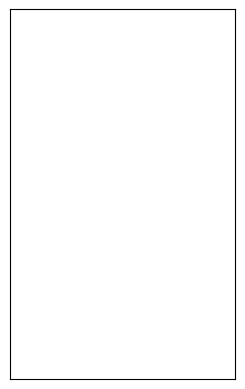

In [8]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_train[0])

from PIL import Image
import numpy as np
pil_image = Image.fromarray(X_train[0])
pil_image = np.array(pil_image.resize((224,224)))
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pil_image)

To resize the dataset from (32,32,3) to (224,224,3) , you may try out defining a function. Then applying it on the whole dataset at once and store the output. However, you may run out of memory while doing so.

To counter that, we have a simple solution. tf.keras.layers.Resizing which will resize the image to shape (224,224) and then Rescaling to normalize the images if not done earlier. This method won't return error as model.fit process only a small batch at a time (default 32) and not the whole dataset.


Now, start building the model for input image shape of (224,224,3).
Add input layer of (32,32,3) , Resizing, Rescaling, then the whole model (include all the 5 blocks).

Now, if you want to save some time, reduce the number of neurons in the dense layers.

You may also try out using TPU on this one. Check out how to configure TPU.

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape for the original images (32, 32, 3)
input_shape_original = (32, 32, 3)

# Define the input shape for the resized images (224, 224, 3)
input_shape_resized = (224, 224, 3)

# Define the VGGNet-16 architecture for input shape (224, 224, 3)
model_resized = models.Sequential()

# Add the input layer with original input shape
model_resized.add(layers.Input(shape=input_shape_original))

# Resize the images to (224, 224, 3)
model_resized.add(layers.Resizing(input_shape=input_shape_original[0:2] + (3,), target_shape=input_shape_resized[0:2]))

# Rescale the pixel values to [0, 1] range if not done earlier
model_resized.add(layers.Rescaling(scale=1./255.))

# Block 1
model_resized.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model_resized.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model_resized.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 4
model_resized.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 5
model_resized.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model_resized.add(layers.BatchNormalization())
model_resized.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten layer
model_resized.add(layers.Flatten())

# Reduce the number of neurons in the dense layers (optional)
model_resized.add(layers.Dense(4096, activation='relu'))
model_resized.add(layers.Dense(1000, activation='relu'))
model_resized.add(layers.Dense(100, activation='relu'))
model_resized.add(layers.Dense(20, activation='softmax'))

# Print the model summary
model_resized.summary()

TypeError: Resizing.__init__() missing 2 required positional arguments: 'height' and 'width'

# Question 4 Transfer Learning

In this question, we will implement another CNN architecture on the same dataset. However, we won't build it ourselves. We will use the pre-trained weights of the model already available. This is called Transfer Learning.

Now there are many ways of obtaining those weights : Huggingface, Tensorflow Hub, Pytorch Hub, etc etc etc...

However, we won't look into much details and implement only the models present in keras applications (https://www.tensorflow.org/api_docs/python/tf/keras/applications) .

Choose any of the model and train it on the dataset. As a tutorial, refer to this : https://www.tensorflow.org/tutorials/images/transfer_learning .

The only thing you need to know is what should be the input size for a particular model .

Moreover, since our dataset has only 20 classes and most models returns output of 1000 classes, pass in the parameter **include_top=False** while calling the model. This will return only the convolution layers. Then, you can add custom Dense layers for classification.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model (excluding the top dense layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers so they are not updated during training
base_model.trainable = False

# Create the new classification layers
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

# Print the model summary
model.summary()

58889256/58889256 [==============================] - 12s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dense_7 (Dense)             (None, 20)                5140      
                                                                 
Total params: 21142612 (80.65 MB)
Trainable params: 6427924 (24.52 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
